# 隐藏代码 

In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

ToggleButton(value=False, description='Show code')

# 导入数据 

In [1]:
# -*- coding: cp936 -*-
import pandas as pd
from bs4 import BeautifulSoup
import urllib,math,numpy
import requests
from pymongo import MongoClient
import cgi
import re,datetime,json,time
from math import  floor
#设置try的次数
#from docx import Document
#from docx.shared import Pt
#from docx.shared import Inches
#from docx.oxml.ns import qn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  
client=MongoClient('mongodb://root:' + '5768116' + '@121.196.220.14')
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) #用于在散点图中输出中文
font_set2 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9) #用于在散点图中输出中文
import matplotlib as mpl   #显示中文
from sklearn import metrics
from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
from sklearn.linear_model import LinearRegression
import json,csv

import statsmodels.api as sm
import numpy as np
import pandas as pd
db = client.jishi  
collection = db.jishi  

db5 = client.lilvquxian
collection5 = db5.lilvquxian

db6 = client.piaofenxi
collection6 = db6.piaofenxi

db11=client.cundan
collection11 = db11.cundan

db12=client.xianxia
collection12 = db12.xianxia

db14=client.piaojiaosuo2
collection14 = db14.piaojiaosuo2

db15=client.cundanbank
collection15 = db15.cundanbank
    
db16=client.guogu
collection16 = db16.guogu

db17=client.yucebiao
collection17 = db17.yucebiao

db18=client.lilvquxian
collection18 = db18.lilvquxian

db19=client.cundanfenxi
collection19 = db19.cundanfenxi


db20=client.piaojiaosuo4
collection20 = db20.piaojiaosuo4
maxTryNum=26




#1.取足年国股数据和更新
cursor = collection16.find({'类型':'日终'})
guogu_df= pd.DataFrame(list(cursor))
guogu_df['价格日期'] = pd.to_datetime(guogu_df['价格日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
guogu_df = guogu_df.sort_values(by='价格日期', ascending=True)
guogu_df= guogu_df.reset_index(drop=True)    #重新定义索引

cursor = collection16.find({'类型':'预估'})
ygguogu_df= pd.DataFrame(list(cursor))
ygguogu_df['价格日期'] = pd.to_datetime(ygguogu_df['价格日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
ygguogu_df = ygguogu_df.sort_values(by='价格日期', ascending=True)
ygguogu_df= ygguogu_df.reset_index(drop=True)    #重新定义索引

gengxin=''
#gengxin=input('    是否需要更新当日市场票据足年国股利率:')
if gengxin!='':
        shijian=time.strftime('%Y-%m-%d',time.localtime(time.time()))
        import datetime
        shijian = datetime.datetime.strptime(shijian, "%Y-%m-%d")
        jin=input('    请输入当日日期,输入格式为“2017-01-01”，不输入默认为今天:')
        if jin!='':
                shijian0=jin
                shijian=datetime.datetime.strptime(jin , "%Y-%m-%d")

        shijian=str(shijian.strftime("%Y-%m-%d"))
        guoguj=input('    %s日终，足年国股为%s；%s预估，价格为%s。\n    请输入今日终的足年国股价格：'%(guogu_df.loc[(len(guogu_df)-1),'价格日期'],guogu_df.loc[(len(guogu_df)-1),'足年国股'],ygguogu_df.loc[(len(ygguogu_df)-1),'价格日期'],ygguogu_df.loc[(len(ygguogu_df)-1),'足年国股']))
        if (guoguj!=''):
                collection16.remove({ "$and":[{'价格日期':str(shijian)},{'类型':'日终'}] })
                guogu_df=pd.DataFrame({'统计日期': [shijian],
                           '足年国股': [guoguj],
                           '类型':'日终',
                           '价格日期':[shijian]
                  })
        
                records = json.loads(guogu_df.T.to_json()).values()
                collection16.insert(records)    
                print('    已经更新。')

cursor = collection16.find({'类型':'日终'})
guogu_df= pd.DataFrame(list(cursor))
guogu_df['价格日期'] = pd.to_datetime(guogu_df['价格日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
guogu_df = guogu_df.sort_values(by='价格日期', ascending=True)
guogu_df= guogu_df.reset_index(drop=True)    #重新定义索引
    
model_guogu_df=guogu_df[['价格日期','足年国股']]
model_guogu_df['价格日期'] = pd.to_datetime(model_guogu_df['价格日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式
zunian=float(model_guogu_df.loc[(len(model_guogu_df)-1),'足年国股'])
zunianshijian=model_guogu_df.loc[(len(model_guogu_df)-1),'价格日期']    
model_guogu_df=model_guogu_df.set_index(['价格日期'])
model_guogu_df['足年国股'] = model_guogu_df['足年国股'].astype('float')     
    





#2.收票/出票
cursor = collection6.find()
piaofenxi = pd.DataFrame(list(cursor))
piaofenxi['统计日期'] = pd.to_datetime(piaofenxi['统计日期']).astype('str')     #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
piaofenxi=piaofenxi[piaofenxi['机构']!='中介']
piaofenxi1=piaofenxi['收票'].groupby([piaofenxi['统计日期']]).sum()
piaofenxi2=piaofenxi['出票'].groupby([piaofenxi['统计日期']]).sum()
piaofenxi2=piaofenxi2.reset_index(drop = False)
piaofenxi1=piaofenxi1.reset_index(drop = False)
piaofenxi1=piaofenxi1.set_index('统计日期')
piaofenxi2=piaofenxi2.set_index('统计日期')
piaofenxi3=pd.concat([piaofenxi1,piaofenxi2], axis=1)


#3.票交所发行量
cursor = collection14.find()
piaojiaosuo = pd.DataFrame(list(cursor))
piaojiaosuo['提取日期'] = pd.to_datetime(piaojiaosuo['提取日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式
piaojiaosuo = piaojiaosuo.sort_values(by=['提取日期'], ascending=True)
piaojiaosuo2=piaojiaosuo[piaojiaosuo['数据']=='当日']
piaojiaosuo2=piaojiaosuo2[['提取日期','承兑金额/亿元','贴现金额/亿元','交易金额/亿元','承兑余额/亿元','贴现余额/亿元']]
piaojiaosuo2=piaojiaosuo2.drop_duplicates('提取日期', keep='last')  #删除重复值
model_piaojiaosuo_df=piaojiaosuo2.set_index('提取日期')



cursor = collection20.find()
piaojiaosuo4 = pd.DataFrame(list(cursor))

   # xinkehu2019=df[(df['年份']=='2018年下半年')|(df['年份']=='2019年上半年')]
piaojiaosuo4['日期'] = pd.to_datetime(piaojiaosuo4['日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式

piaojiaosuo41=piaojiaosuo4[(piaojiaosuo4['统计项目']=='银票承兑余额') |(piaojiaosuo4['统计项目']=='银票贴入余额')]
piaojiaosuo41=piaojiaosuo41['余额（亿元）'].groupby([piaojiaosuo41['日期'],piaojiaosuo41['统计项目']]).sum().unstack('统计项目')
piaojiaosuo41=piaojiaosuo41.reset_index(drop = False)

piaojiaosuo41=piaojiaosuo41.set_index('日期')
                                                    





#3.票交所收益率曲线
cursor = collection5.find()
paojiaosuoll = pd.DataFrame(list(cursor))
paojiaosuoll['日期'] = pd.to_datetime(paojiaosuoll['日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式
paojiaosuoll = paojiaosuoll.sort_values(by=['日期'], ascending=True)
paojiaosuoll=paojiaosuoll.set_index('日期')


#4.生成银行存单
cursor2 = collection19.find()
result0= pd.DataFrame(list(cursor2))
result0= result0.reset_index(drop=True)    #重新定义索引
result0=result0[result0['银行分类']!='外资行']
result0= result0.reset_index(drop=True)    #重新定义索引


guogu=['工商银行','农行','建行','交通银行','邮储银行','中国银行']
gufen=['光大银行','广发银行','民生银行','浦发银行','平安银行','兴业银行','中信银行','招商银行','华夏']
for i in range(0, len(result0)):
        if (result0.loc[i,'银行分类'] in guogu):
            result0.loc[i,'银行分类2']='国股行'

        elif(result0.loc[i,'银行分类']in gufen):
            result0.loc[i,'银行分类2']='股份行'
        
        elif(result0.loc[i,'银行分类']=='城商'):
            result0.loc[i,'银行分类2']='城商'

        elif(result0.loc[i,'银行分类']=='农商行'):
            result0.loc[i,'银行分类2']='农商行'
result0['shi']=result0['实际发行(亿)']*result0['实际加权利率(%)AAA']
result0['ji']=result0['计划发行(亿)']*result0['计划加权利率(%)AAA']


result0=result0.groupby(['xz','发行日','期限','银行分类2']).sum()  #在这一步，空白的开始变成数值0
result0['实际加权利率2(%)AAA']=result0['shi']/result0['实际发行(亿)']
result0['计划加权利率2(%)AAA']=result0['ji']/result0['计划发行(亿)']


re11=result0.query('xz==1')
re11=re11.reset_index(["xz"],drop=True)
re11=re11[['实际发行(亿)','计划发行(亿)','实际加权利率2(%)AAA','计划加权利率2(%)AAA']]

re22=result0.query('xz==2')
re22=re22.reset_index(["xz"],drop=True)
re22=re22[['计划加权利率2(%)AAA','计划发行(亿)']]
re22.rename(columns={'计划发行(亿)': '原计划发行(亿)','计划加权利率2(%)AAA':'原计划加权利率2(%)AAA'}, inplace=True) 

    
result0 = pd.concat([re11, re22], axis=1)
result0=result0.reset_index(drop=False)

#画图的时候把0替换成NAN
for i in range(0,len(result0)):
        if result0.loc[i,'原计划加权利率2(%)AAA']==0:
               result0.loc[i,'原计划加权利率2(%)AAA'] =numpy.nan
        if result0.loc[i,'实际加权利率2(%)AAA']==0:
               result0.loc[i,'实际加权利率2(%)AAA'] =numpy.nan


model_cundan_df=result0[result0['银行分类2']=='股份行']
model_cundan_df=model_cundan_df[['发行日','期限','原计划加权利率2(%)AAA']]
model_cundan_df['发行日'] = pd.to_datetime(model_cundan_df['发行日']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式
model_cundan_df=model_cundan_df.set_index(['发行日'],drop=True)

cundan1=model_cundan_df[model_cundan_df['期限']=='1月']
cundan2=model_cundan_df[model_cundan_df['期限']=='3月']
cundan3=model_cundan_df[model_cundan_df['期限']=='6月']
cundan4=model_cundan_df[model_cundan_df['期限']=='1年']
model_cundan_df=pd.concat([cundan1,cundan2,cundan3,cundan4], axis=1,join='outer') #默认是outer

model_cundan_df['1个月存单利率']=model_cundan_df.iloc[:,1]
model_cundan_df['3个月存单利率']=model_cundan_df.iloc[:,3]
model_cundan_df['6个月存单利率']=model_cundan_df.iloc[:,5]
model_cundan_df['1年存单利率']=model_cundan_df.iloc[:,7]
model_cundan_df=model_cundan_df[['1个月存单利率','3个月存单利率','6个月存单利率','1年存单利率']]


#线上同存价格

dbl=client.chaijie
collectionl= dbl.chaijie
cursor = collectionl.find()
model_tongcun_df = pd.DataFrame(list(cursor))
model_tongcun_df=model_tongcun_df[['日期','kind','加权利率(%)','收盘利率(%)']]
model_tongcun_df['日期'] = pd.to_datetime(model_tongcun_df['日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式

zhiya1=model_tongcun_df[model_tongcun_df['kind']=='IBO001']
zhiya1=zhiya1.drop_duplicates('日期', keep='last')  #删除重复值
zhiya1=zhiya1.set_index('日期')

zhiya2=model_tongcun_df[model_tongcun_df['kind']=='IBO007']
zhiya2=zhiya2.drop_duplicates('日期', keep='last')  #删除重复值
zhiya2=zhiya2.set_index('日期')
model_tongcun_df=pd.concat([zhiya1,zhiya2], axis=1,join='outer') #默认是outer

model_tongcun_df['隔夜同存加权利率']=model_tongcun_df.iloc[:,1]
model_tongcun_df['隔夜同存收盘利率']=model_tongcun_df.iloc[:,2]
model_tongcun_df['7天同存加权利率']=model_tongcun_df.iloc[:,4]
model_tongcun_df['7天同存收盘利率']=model_tongcun_df.iloc[:,5]
model_tongcun_df=model_tongcun_df[['隔夜同存加权利率','隔夜同存收盘利率','7天同存加权利率','7天同存收盘利率']]




#质押式回购
db20=client.zhiyashi
collection20= db20.zhiyashi
cursor2 = collection20.find()
model_zhiya_df= pd.DataFrame(list(cursor2))
model_zhiya_df=model_zhiya_df[['日期','kind','加权利率(%)','收盘利率(%)']]
model_zhiya_df['日期'] = pd.to_datetime(model_zhiya_df['日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式 注意要换成string格式

zhiya1=model_zhiya_df[model_zhiya_df['kind']=='R001']
zhiya1=zhiya1.drop_duplicates('日期', keep='last')  #删除重复值
zhiya1=zhiya1.set_index('日期')

zhiya2=model_zhiya_df[model_zhiya_df['kind']=='R007']
zhiya2=zhiya2.drop_duplicates('日期', keep='last')  #删除重复值
zhiya2=zhiya2.set_index('日期')
model_zhiya_df=pd.concat([zhiya1,zhiya2], axis=1,join='outer') #默认是outer

model_zhiya_df['隔夜质押加权利率']=model_zhiya_df.iloc[:,1]
model_zhiya_df['隔夜质押收盘利率']=model_zhiya_df.iloc[:,2]
model_zhiya_df['7天质押加权利率']=model_zhiya_df.iloc[:,4]
model_zhiya_df['7天质押收盘利率']=model_zhiya_df.iloc[:,5]
model_zhiya_df=model_zhiya_df[['隔夜质押加权利率','隔夜质押收盘利率','7天质押加权利率','7天质押收盘利率']]



df01=pd.concat([piaojiaosuo41,model_cundan_df,piaofenxi3,model_zhiya_df,model_piaojiaosuo_df,model_guogu_df,paojiaosuoll,model_tongcun_df], axis=1,join='outer')
df01=df01.reset_index(drop = False)
df01.rename(columns={'index':'日期'}, inplace=True)






print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:239: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future be

2019-10-31 20:55:48


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:300: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



## 导入数据2

       xz         发行日  实际加权利率(%)  实际加权利率(%)AAA  实际发行(亿)  期限  条数  计划加权利率(%)  \
0       1  2018-01-02       4.00          4.00     50.0  1月   1       4.00   
1       1  2018-01-02       4.70          4.70     24.7  3月   1       4.70   
2       1  2018-01-03       4.00          4.00     39.2  1月   1       4.00   
3       1  2018-01-08       4.70          4.70     61.6  3月   4       4.70   
4       1  2018-01-31       4.80          4.80     21.0  3月   1       4.80   
5       2  2018-10-12        NaN           NaN      NaN  9月   6       3.58   
6       2  2018-10-12        NaN           NaN      NaN  9月   1       3.50   
7       2  2018-10-12        NaN           NaN      NaN  9月   1       3.45   
8       2  2018-10-12        NaN           NaN      NaN  9月   1       3.50   
9       2  2018-10-12        NaN           NaN      NaN  9月   1       3.50   
10      2  2018-10-12        NaN           NaN      NaN  9月   1       3.55   
11      2  2018-10-12        NaN           NaN      NaN  9月   1 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:191: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:224: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:261: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Program

2019-11-06 21:44:28
输出准确率：
0.8741395425855357
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
输出截距：
-0.10936724496692163
输出权重：
[ 0.          1.20020048  0.00343339 -0.06460467]
        足年国股f    预测足年国股          日期         日期f
432  2.670217  3.190168  2019-10-30  2019-10-31
433  2.801771  3.189236  2019-10-31  2019-11-01
434  2.796926  3.186259  2019-11-01  2019-11-04
435  2.803539  3.158246  2019-11-04  2019-11-05
436  2.759013  3.360046  2019-11-05  2019-11-06
          日期f    预测足年国股
0  2019-07-24  3.123859


NameError: name 'stop' is not defined

# 用混合票交所收益率曲线做分析

## dd

In [3]:
import time,datetime



#ip = request.remote_addr



#一、初步处理数据

guogu_df=guogu_df[['日期','6个月存单利率','足年国股','7天质押加权利率','7天同存加权利率','承兑金额/亿元','贴现金额/亿元','收票','出票']]
guogu_df['日期'] = pd.to_datetime(guogu_df['日期']).astype('str')   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
guogu_df['6个月存单利率']=guogu_df['6个月存单利率'].astype('float')
guogu_df['7天同存加权利率']=guogu_df['7天同存加权利率'].astype('float')
guogu_df['7天质押加权利率']=guogu_df['7天质押加权利率'].astype('float')

guogu_df['收票/出票']=guogu_df['收票'].astype('float')/guogu_df['出票'].astype('float')
guogu_df['贴/承']=guogu_df['贴现金额/亿元'].astype('float')/guogu_df['承兑金额/亿元'].astype('float')
guogu_df['足年国股']=guogu_df['足年国股'].astype('float')
guogu_df['6个月存单利率f']=guogu_df['6个月存单利率'].shift(-1)
guogu_df['贴/承b']=guogu_df['贴/承'].shift(1)
guogu_df['足年国股f']=guogu_df['足年国股'].shift(-1)
guogu_df['日期f']=guogu_df['日期'].shift(-1)



#1.1.取出最新数据预备作线性回归预测数据
guogu_df2=guogu_df.fillna(method='ffill')  
x1=guogu_df2.loc[len(guogu_df2)-1,'6个月存单利率']
x2= guogu_df2.loc[len(guogu_df2)-1,'7天质押加权利率']
x3=  guogu_df2.loc[len(guogu_df2)-1,'7天同存加权利率']
d4=  guogu_df2.loc[len(guogu_df2)-1,'日期']    






#1.2.取出最新数据预备作KNN预测数据
guogu_df2['6个月存单利率fq'] = guogu_df2['6个月存单利率f']-guogu_df2['6个月存单利率'] 
x21=guogu_df2.loc[len(guogu_df2)-1,'6个月存单利率fq']
x22= guogu_df2.loc[len(guogu_df2)-1,'收票/出票']
x23=  guogu_df2.loc[len(guogu_df2)-1,'贴/承b']

print(x21,x22,x23)
#for i in range(len(guogu_df)):
#    if np.isnan(guogu_df['足年国股'][i]) :
#        guogu_df = guogu_df.drop(i)




#guogu_df= guogu_df.reset_index(drop=True)    #重新定义索引

#删除最后两条数据
guogu_df = guogu_df[:len(guogu_df)-2]
guogu_df= guogu_df.reset_index(drop=True)    #重新定义索引





# 二、做线性回归
yuanshi_df=guogu_df[['日期','日期f','6个月存单利率f',
       '足年国股f',#'收票/出票',

      '7天质押加权利率', '7天同存加权利率'
      ]]  #'收票/出票','贴/承b','贴/交b','7天质押加权利率',

print(yuanshi_df)

yuanshi_df=yuanshi_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值

#2.1排除月末4-5天的数据
for i in range(len(yuanshi_df)):
  if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['30','31','29','28','27']:
     yuanshi_df = yuanshi_df.drop(i)


yuanshi_df=yuanshi_df.dropna(how='any')


x=yuanshi_df[[ '6个月存单利率f',
     '7天质押加权利率',
'7天同存加权利率'
     ]]  
X = sm.add_constant(x)
beta=np.array([1,10])
e = np.random.normal(size=len(yuanshi_df))
y=yuanshi_df[ '足年国股f']


#2.2构建模型
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
linreg=linear_model.LinearRegression()
model=linreg.fit(X_train, y_train)#yh=lr.predict(x)  #.reshape(-1,1)
congidence=linreg.score(X_test, y_test)  #查看测试模型的准确率




print('输出准确率：')
print(congidence)
# 训练后模型截距

#画图



print(model)
print('输出截距：')
print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
print('输出权重：')

print (linreg.coef_)
#六、模型画图
y_pred = linreg.predict(X)




yuanshi_df['预测足年国股']=y_pred

yuce_df=pd.DataFrame()


yuanshi_df=yuanshi_df[['足年国股f','预测足年国股','日期','日期f']]
w=[[1,x1,x2,x3]]
#w= sm.add_constant(w)
y_pred7 = linreg.predict(w)
yuce_df.loc[0,'日期f']=d4
yuce_df.loc[0,'预测足年国股']=y_pred7

zong_df=pd.concat([yuanshi_df,yuce_df])

print(zong_df.tail())





#二、模型二
guogu_df=guogu_df[['贴/承b','出票',
 '日期', '日期f',
    '6个月存单利率',   '6个月存单利率f','足年国股f','足年国股',
    '收票/出票']]
guogu_df['足年国股fq2']=0

guogu_df=guogu_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值

guogu_df['足年国股fq']= guogu_df['足年国股f']-guogu_df['足年国股']  ###########

for i in range(len(guogu_df)):
    if guogu_df['足年国股fq'][i]>0:
        guogu_df['足年国股fq2'][i]=1 
    else:
        guogu_df['足年国股fq2'][i]=0



#guogu_df=guogu_df[guogu_df['足年国股fq2']!='']     



guogu_df= guogu_df.reset_index(drop=True)    #重新定义索引

guogu_df['6个月存单利率fq'] = guogu_df['6个月存单利率f']-guogu_df['6个月存单利率'] 
guogu_df=guogu_df[guogu_df['出票'] !=0]
guogu_df=guogu_df.dropna(how='any')
guogu_df= guogu_df.reset_index(drop=True)    #重新定义索引

X=guogu_df[[  
   '贴/承b',
    '6个月存单利率fq',
    '收票/出票']]
y=guogu_df['足年国股fq2']
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
#X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=1)

for i in range(2,30):
  knn_classifier=KNeighborsClassifier(i)
  knn_classifier.fit(x_train,y_train)
  y_predict=knn_classifier.predict(x_test)
  scores=knn_classifier.score(x_test,y_test)
  print('acc:{}'.format(sum(y_predict==y_test)/len(x_test)),scores)






knn_classifier=KNeighborsClassifier(12)
knn_classifier.fit(x_train,y_train)
y_predict=knn_classifier.predict(x_test)
scores=knn_classifier.score(x_test,y_test)
print('acc:{}'.format(sum(y_predict==y_test)/len(x_test)),scores)

y_predict=knn_classifier.predict(X)



guogu_df['预测涨跌']=y_predict



guogu_df=guogu_df[['预测涨跌','足年国股fq2','日期', '日期f']]

#w= sm.add_constant(w)
yuce_df2=pd.DataFrame()
w=[[x21,x22,x23]]

yuce_df2.loc[0,'日期f']=d4
yuce_df2.loc[0,'预测涨跌']=knn_classifier.predict(w)




print(yuce_df2)
zong_df2=pd.concat([guogu_df,yuce_df2])
zong_df=zong_df.set_index(['日期f'])
zong_df2=zong_df2.set_index(['日期f'])
zong_df3=pd.concat([zong_df,zong_df2],axis=1)


#  zong_df.to_excel('75.xls')
#  zong_df2.to_excel('76.xls')

#print(zong_df3)

zong_df3.to_excel('74.xls')

zong_df3=zong_df3.fillna('')   #把所有空值统一成''


zong_df3=zong_df3[zong_df3['预测足年国股']!='']


zong_df3= zong_df3.reset_index(drop=True)    #重新定义索引


#yuce2=zong_df3['预测涨跌2'].tolist()
yuce3=str(zong_df3.loc[len(zong_df3)-1,'预测涨跌'])

print(yuce3)
date_shun=zong_df3['index'].tolist()
yuce=zong_df3['预测足年国股'].tolist()
shiji=zong_df3['足年国股f'].tolist()

print(zong_df3)








0.0 0.875 0.48511114426376256
             日期         日期f  6个月存单利率f     足年国股f  7天质押加权利率  7天同存加权利率
0    2018-01-02  2018-01-03       NaN  5.090000    2.5935    3.6295
1    2018-01-03  2018-01-04       NaN  5.000000    2.9998       NaN
2    2018-01-04  2018-01-05       NaN  4.850000    2.4138    3.1688
3    2018-01-05  2018-01-08  4.700000  4.900000    2.8161       NaN
4    2018-01-08  2018-01-09       NaN  4.900000    2.7989       NaN
5    2018-01-09  2018-01-10  4.679365  4.950000    2.9488       NaN
6    2018-01-10  2018-01-11  4.700000  4.950000    3.1127       NaN
7    2018-01-11  2018-01-12  4.750000  5.000000    3.4292    3.4289
8    2018-01-12  2018-01-15       NaN  5.040000    3.3848    3.3340
9    2018-01-15  2018-01-16  4.750000  5.050000    3.4427    2.9916
10   2018-01-16  2018-01-17  4.750000  5.120000    3.4043    3.2899
11   2018-01-17  2018-01-18  4.840000  5.350000    3.7200    3.7466
12   2018-01-18  2018-01-19  4.850000  5.400000    3.8133    3.5040
13   2018-01-19  2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


acc:0.6081081081081081 0.6081081081081081
acc:0.6621621621621622 0.6621621621621622
acc:0.6351351351351351 0.6351351351351351
acc:0.6756756756756757 0.6756756756756757
acc:0.6351351351351351 0.6351351351351351
acc:0.6351351351351351 0.6351351351351351
acc:0.6351351351351351 0.6351351351351351
acc:0.6621621621621622 0.6621621621621622
acc:0.6486486486486487 0.6486486486486487
acc:0.6621621621621622 0.6621621621621622
acc:0.6486486486486487 0.6486486486486487
acc:0.6216216216216216 0.6216216216216216
acc:0.6621621621621622 0.6621621621621622
acc:0.6486486486486487 0.6486486486486487
acc:0.6756756756756757 0.6756756756756757
acc:0.6756756756756757 0.6756756756756757
acc:0.6891891891891891 0.6891891891891891
acc:0.7027027027027027 0.7027027027027027
acc:0.7027027027027027 0.7027027027027027
acc:0.7297297297297297 0.7297297297297297
acc:0.7027027027027027 0.7027027027027027
acc:0.7162162162162162 0.7162162162162162
acc:0.7702702702702703 0.7702702702702703
acc:0.7567567567567568 0.756756756

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:228: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:231: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



KeyError: 'index'

## dd2

## 33

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     index          日期     银票承兑余额    银票贴入余额  1个月存单利率  3个月存单利率  6个月存单利率  \
452    452  2019-10-25  105977.38  73636.05      2.7     2.75     2.85   
453    453  2019-10-28  105977.38  73636.05      2.7     2.75     2.85   
454    454  2019-10-29  105977.38  73636.05      2.7     2.75     2.85   
455    455  2019-10-30  105977.38  73636.05      2.7     2.75     2.85   
456    456  2019-10-31  105977.38  73636.05      2.7     2.75     2.85   

       1年存单利率     收票     出票    ...           6月        7D        7月        8月  \
452  3.023191   93.0   52.0    ...     2.824519  2.749787  2.831473  2.838203   
453  3.023191   74.0   26.0    ...     2.754732  2.641425  2.760478  2.766039   
454  3.023191  176.0  142.0    ...     2.628894  2.539209  2.642352  2.655376   
455  3.023191   85.0  182.0    ...     2.471723  1.967047  2.514395  2.555692   
456  3.023191   42.0   43.0    ...     2.621850  1.990267  2.635537  2.648782   

           9月                       _id 隔夜同存加权利率 隔夜同存收盘利率 7天同存加权利率  

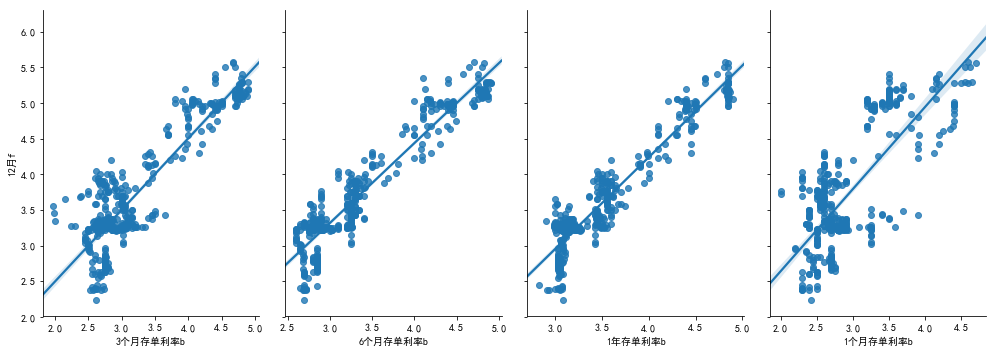

C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


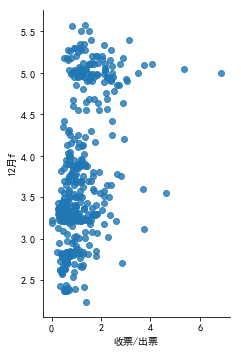

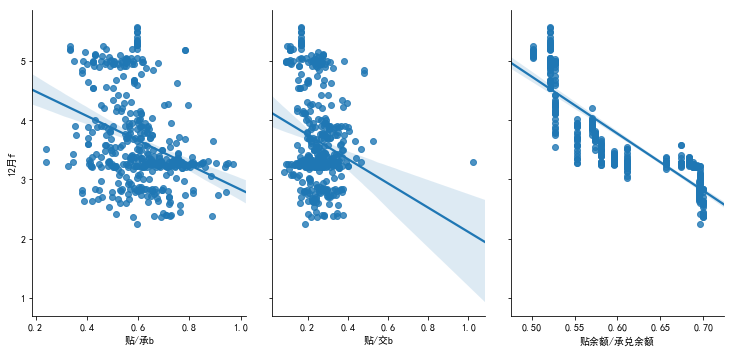

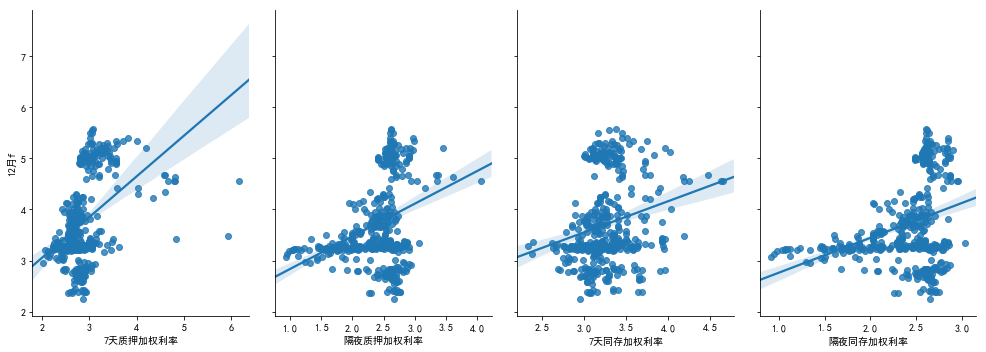

457
374
                            OLS Regression Results                            
Dep. Variable:                   12月f   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 31 Oct 2019   Prob (F-statistic):          1.00e-181
Time:                        20:55:58   Log-Likelihood:                -38.712
No. Observations:                 374   AIC:                             85.42
Df Residuals:                     370   BIC:                             101.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1786      0.158      1.132 

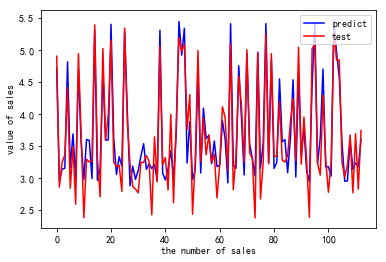

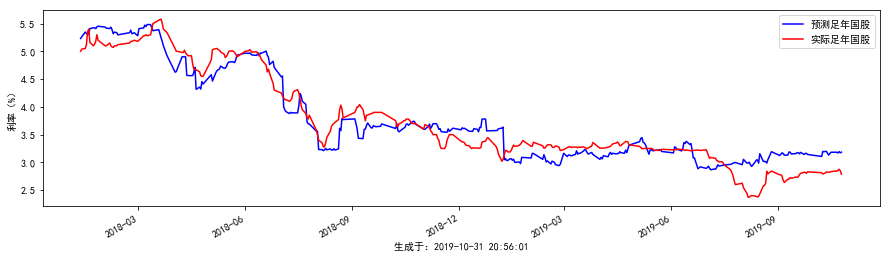

[3.18347578]


In [2]:
# 把没有记录足年国股数据的行和月末数据删除 
#df00.to_csv('ddd.csv')
df=df01
import csv,xlrd,xlwt

df2=df[df['日期']<'2018-12-06']
df2= df2.reset_index(drop=True)    #重新定义索引
for i in range(len(df2)):
    if np.isnan(df2['足年国股'][i]):
        df2 = df2.drop(i)
#df['日期'] = pd.to_datetime(df['日期']).astype('str') #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
#df= df.reset_index(drop=True)    #重新定义索引
df2['12月']=df2['足年国股']
df2=df2.set_index(['日期'])



df1=df[df['日期']>='2018-12-06']
df1= df1.reset_index(drop=True)    #重新定义索引
df1=df1.set_index(['日期'])

df=pd.concat([df2,df1], axis=0)
df= df.reset_index(drop=False)    #重新定义索引





yuanshi_df2=df[['日期','3个月存单利率','6个月存单利率','1年存单利率','1个月存单利率',
               '12月','7天质押加权利率',
               '隔夜质押加权利率','7天同存加权利率','隔夜同存加权利率','承兑金额/亿元','贴现金额/亿元','收票','出票']]  #'收票/出票','贴/承b','贴/交b','7天质押加权利率',
yuanshi_df2['足年国股']=yuanshi_df2['12月']
yuanshi_df2= yuanshi_df2.reset_index(drop=True)    #重新定义索引
#yuanshi_df2=yuanshi_df2.fillna(method='ffill')  #用缺失值前面的数字填充缺失值
collection17.remove()

records = json.loads(yuanshi_df2.T.to_json()).values()
collection17.insert(records)



#删除最后两条数据
df = df[:len(df)-1]
df= df.reset_index(drop=True)    #重新定义索引
df=df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值


#for i in range(len(df)):
#    if np.isnan(df['12月'][i]):
#        df = df.drop(i)



df= df.reset_index(drop=False)    #重新定义索引






print(df.tail())

import seaborn as sns
import matplotlib as mpl   #显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
df['3个月存单利率']=df['3个月存单利率'].astype('float')
df['1个月存单利率']=df['1个月存单利率'].astype('float')
df['6个月存单利率']=df['6个月存单利率'].astype('float')
df['1年存单利率']=df['1年存单利率'].astype('float')


df['隔夜同存加权利率']=df['隔夜同存加权利率'].astype('float')
df['7天同存加权利率']=df['7天同存加权利率'].astype('float')
df['隔夜质押加权利率']=df['隔夜质押加权利率'].astype('float')
df['7天质押加权利率']=df['7天质押加权利率'].astype('float')



df['收票/出票']=df['收票'].astype('float')/df['出票'].astype('float')
df['贴/承']=df['贴现金额/亿元'].astype('float')/df['承兑金额/亿元'].astype('float')
df['贴/交']=df['贴现金额/亿元'].astype('float')/df['交易金额/亿元'].astype('float')
df['贴余额/承兑余额']=df['银票贴入余额'].astype('float')/df['银票承兑余额'].astype('float')



df['足年国股']=df['足年国股'].astype('float')
df['12月']=df['12月'].astype('float')
df['9月']=df['9月'].astype('float')
df['6月']=df['6月'].astype('float')
df['3月']=df['3月'].astype('float')



#制作下一天的利率列
df['3个月存单利率b'] = df['3个月存单利率'].shift(1)   
df['1个月存单利率b']=df['1个月存单利率'].shift(1)
df['6个月存单利率b']=df['6个月存单利率'].shift(1)
df['1年存单利率b']=df['1年存单利率'].shift(1)
df['足年国股f']=df['足年国股'].shift(-1)

df['12月f']=df['12月'].shift(-1)
df['9月f']=df['9月'].shift(-1)
df['6月f']=df['6月'].shift(-1)
df['3月f']=df['3月'].shift(-1)



#制作上一天票交所数据列
df['贴/承b']=df['贴/承'].shift(1)
df['贴/交b']=df['贴/交'].shift(1)
#df['贴余额/承兑余额b']=df['贴余额/承兑余额'].shift(1)
df['承兑余额/亿元b']=df['承兑余额/亿元'].astype('float').shift(1)
df['贴现余额/亿元b']=df['贴现余额/亿元'].astype('float').shift(1)
df['7天质押加权利率b']=df['7天质押加权利率'].shift(1)
df['隔夜同存加权利率b']=df['隔夜同存加权利率'].shift(1)
df['隔夜质押加权利率b']=df['隔夜质押加权利率'].shift(1)
df['7天同存加权利率b']=df['7天同存加权利率'].shift(1)


#制作第二天的涨跌幅度

df['3个月存单利率bq'] = df['3个月存单利率']-df['3个月存单利率b']  
df['1个月存单利率bq'] = df['1个月存单利率']-df['1个月存单利率b']  
df['6个月存单利率bq'] = df['6个月存单利率']-df['6个月存单利率b']
df['1年存单利率bq'] = df['1年存单利率']-df['1年存单利率b']  
df['足年国股bq']= df['足年国股f']-df['足年国股'] 
df['贴/承bq']= df['贴/承']-df['贴/承b'] 


df['贴/交bq']= df['贴/交']-df['贴/交b'] 
df['贴现余额/亿元bq']=df['贴现余额/亿元'].astype('float')-df['贴现余额/亿元b'] 
df['承兑余额/亿元bq']=df['承兑余额/亿元'].astype('float')-df['承兑余额/亿元b'] 

df['12月fq']= df['12月f']-df['12月']
df['7天质押加权利率bq']= df['7天质押加权利率']-df['7天质押加权利率b']
df['隔夜同存加权利率bq']= df['隔夜同存加权利率']-df['隔夜同存加权利率b']
df['7天同存加权利率bq']= df['7天同存加权利率']-df['7天同存加权利率b']
df['隔夜质押加权利率bq']= df['隔夜质押加权利率']-df['隔夜质押加权利率b']




#日期修正后的图
yuce1='12月f'

sns.pairplot(df, x_vars=['3个月存单利率b','6个月存单利率b','1年存单利率b','1个月存单利率b'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

sns.pairplot(df, x_vars=['收票/出票'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

sns.pairplot(df, x_vars=['贴/承b','贴/交b','贴余额/承兑余额'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

sns.pairplot(df, x_vars=['7天质押加权利率','隔夜质押加权利率','7天同存加权利率'
                         ,'隔夜同存加权利率'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。






# 做线性回归
yuanshi_df=df[['日期',#'3个月存单利率f',
               '6个月存单利率b',#'1年存单利率f','1个月存单利率f',
               yuce1,#'收票/出票',
              # '贴/承b','贴/交b',
            #   '贴余额/承兑余额',
              '7天质押加权利率',# '隔夜质押加权利率',
               '7天同存加权利率'#,'隔夜同存加权利率'
              ]]  #'收票/出票','贴/承b','贴/交b','7天质押加权利率',
print(len(yuanshi_df))
yuanshi_df=yuanshi_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值




      #   guogu_df=guogu_df[['日期','1个月存单利率','3个月存单利率','6个月存单利率','1年存单利率','足年国股','隔夜质押加权利率','隔夜质押收盘利率','7天质押加权利率','7天质押收盘利率','承兑金额/亿元','贴现金额/亿元','交易金额/亿元']]








#yuanshi_df['月末']=0
for i in range(len(yuanshi_df)):
    if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['30','31','29','28','27']:
        yuanshi_df = yuanshi_df.drop(i)
        #yuanshi_df['月末']=1
#    if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['01','02','03']:
       # yuanshi_df = yuanshi_df.drop(i)
 #       yuanshi_df['月末']=-1
        
yuanshi_df=yuanshi_df.dropna(how='any')



print(len(yuanshi_df))
x=yuanshi_df[[#'3个月存单利率f',
              '6个月存单利率b',
             # '1年存单利率f',
             # '1个月存单利率f',#'收票/出票',
             # '贴/承b','贴/交b',
            #  '贴余额/承兑余额',
             '7天质押加权利率',
  #  '隔夜质押加权利率',
    '7天同存加权利率'
   # '隔夜同存加权利率'
             ]]   #'收票/出票','贴/承b','贴/交b','贴余额/承兑余额b','承兑余额/亿元b','贴现余额/亿元b',
#x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta=np.array([1,10])
e = np.random.normal(size=len(df))
#y = np.dot(X, beta) + e
y=yuanshi_df[yuce1]

model=sm.OLS(y.astype(float),X.astype(float))
model1=model.fit()
print(model1.summary())
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
#变动趋势的图



#2.检验数据的平稳性
from arch.unitroot import ADF
from statsmodels.tsa.stattools import adfuller
print('输出平稳性检验：')
for i in [
    '12月f',
   # '3个月存单利率b',
          '6个月存单利率b',
        #  '1年存单利率b','1个月存单利率b',
            # '收票/出票',
            #   '贴余额/承兑余额',
              '7天质押加权利率',
       #   '隔夜质押加权利率',
          '7天同存加权利率',
        #  '隔夜同存加权利率'
         ]:
    print(i)
    print(ADF(yuanshi_df[i].tolist()))




#2.检验一阶差分，的平稳性

print('输出一阶差分的平稳性：')
for i in [#'3个月存单利率b',
    '6个月存单利率b',
   # '1年存单利率b','1个月存单利率b',
             #'收票/出票',
             #  '贴余额/承兑余额',
              '7天质押加权利率', 
  #  '隔夜质押加权利率',
    '7天同存加权利率'
   # ,'隔夜同存加权利率'
          ]:
    print(i)
    print(adfuller(np.diff(yuanshi_df[i].tolist())))



#3.检验协整关系
print('输出协整关系：')
from statsmodels.tsa.stattools import coint
for i in [#'3个月存单利率b',
          '6个月存单利率b',
         # '1年存单利率b','1个月存单利率b',
           #  '收票/出票',
           #    '贴余额/承兑余额',
              '7天质押加权利率',
 #   '隔夜质押加权利率',
    '7天同存加权利率'
   # ,'隔夜同存加权利率'
      ]:
    print(i)

    print(coint(yuanshi_df['12月f'].tolist(), yuanshi_df[i].tolist()))

    
    
#输出预测分数

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
linreg=linear_model.LinearRegression()
model=linreg.fit(X_train, y_train)#yh=lr.predict(x)  #.reshape(-1,1)
congidence=linreg.score(X_test, y_test)  #查看测试模型的准确率



print('输出模型:')
print (model)
print('输出准确率：')
print(congidence)
    # 训练后模型截距
print('输出截距：')
print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
print('输出权重：')

print (linreg.coef_)
 #画图
y_pred = linreg.predict(X_test)
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/20)  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)



    #做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()


#六、模型画图
y_pred = linreg.predict(X)


yuanshi_df['日期'] = pd.to_datetime(yuanshi_df['日期'])   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
yuanshi_df.to_csv('dddd.csv')


xx=yuanshi_df['日期'].tolist()

yy=yuanshi_df['12月f'].tolist()


#print(xx)
#print(len(xx))
#print(yy)
#print(len(yy))
#print(y_pred)
#print(len(y_pred))
yyy=yy*(1+y_pred)
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
#for i in range(0,len(y_pred)):
 #   yyy[i]=yy[i]*(1+y_pred[i])

    #做ROC曲线
plt.figure()


plt.plot(xx,y_pred,'b',label="预测足年国股")
plt.plot(xx,yy,'r',label="实际足年国股")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("生成于：%s"%time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

plt.ylabel('利率（%）')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
fig =plt.gcf()
fig.set_size_inches(15, 4)
#fig.savefig('images/piaojiaosuol.png') 
    

plt.show()

    
    
yuanshi_df= yuanshi_df.reset_index(drop=True)    #重新定义索引
 
y_pred = linreg.predict([[1,yuanshi_df.loc[len(yuanshi_df)-1,'6个月存单利率b'],yuanshi_df.loc[len(yuanshi_df)-1,'7天质押加权利率'],yuanshi_df.loc[len(yuanshi_df)-1,'7天同存加权利率']]])
print(y_pred)
    
    
    
    
    

# 用纯的收益率曲线做模型

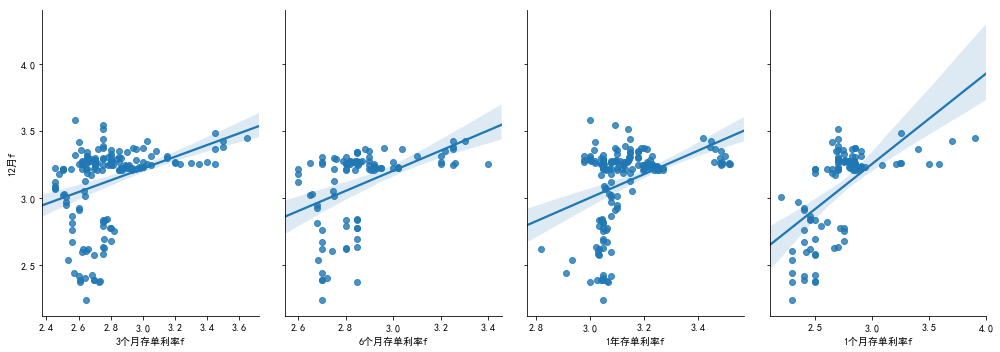

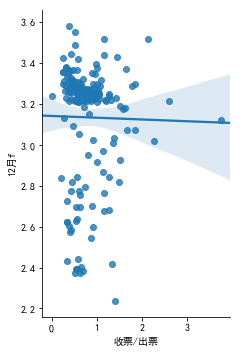

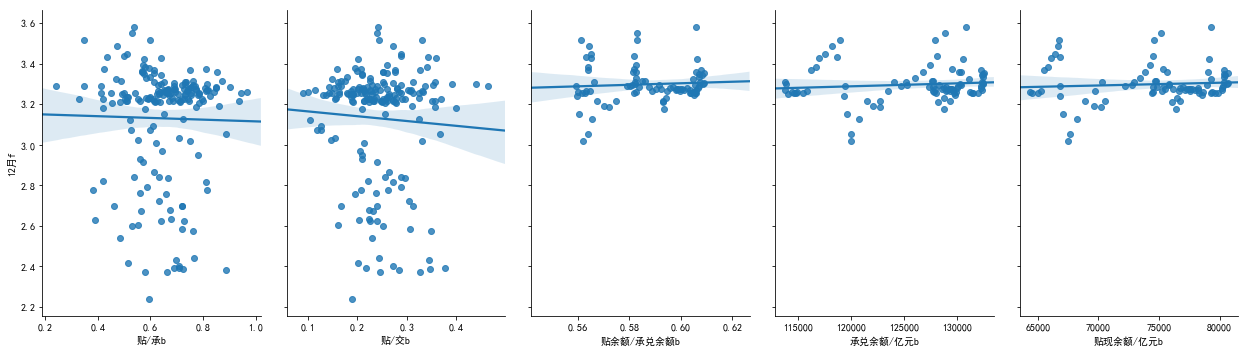

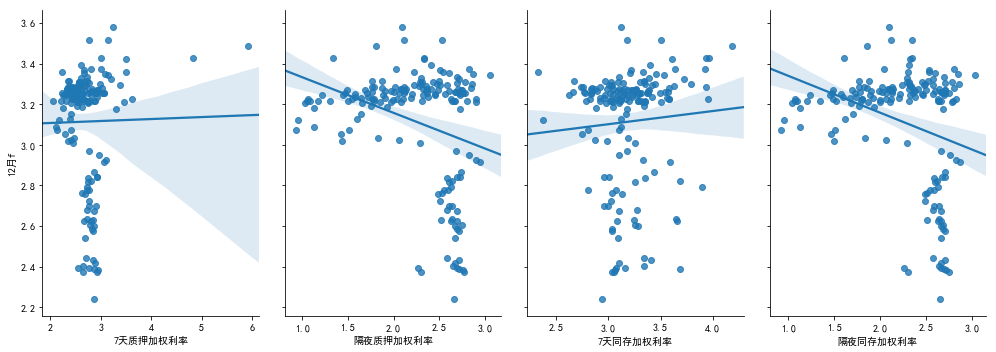

187
152
                            OLS Regression Results                            
Dep. Variable:                   12月f   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     26.63
Date:                Sat, 14 Sep 2019   Prob (F-statistic):           2.49e-32
Time:                        17:41:33   Log-Likelihood:                 80.851
No. Observations:                 152   AIC:                            -131.7
Df Residuals:                     137   BIC:                            -86.34
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -281.3616     25.483    -11.041 

KeyError: '3个月存单利率b'

In [5]:
# 把没有记录足年国股数据的行和月末数据删除 
#df00.to_csv('ddd.csv')
df=df01


df= df.reset_index(drop=True)    #重新定义索引
for i in range(len(df)):
    if np.isnan(df['12月'][i]):
        df = df.drop(i)
#df['日期'] = pd.to_datetime(df['日期']).astype('str') #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
#df= df.reset_index(drop=True)    #重新定义索引

df= df.reset_index(drop=True)    #重新定义索引




import seaborn as sns
import matplotlib as mpl   #显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
df['3个月存单利率']=df['3个月存单利率'].astype('float')
df['1个月存单利率']=df['1个月存单利率'].astype('float')
df['6个月存单利率']=df['6个月存单利率'].astype('float')
df['1年存单利率']=df['1年存单利率'].astype('float')


df['隔夜同存加权利率']=df['隔夜同存加权利率'].astype('float')
df['7天同存加权利率']=df['7天同存加权利率'].astype('float')
df['隔夜质押加权利率']=df['隔夜质押加权利率'].astype('float')
df['7天质押加权利率']=df['7天质押加权利率'].astype('float')



df['收票/出票']=df['收票'].astype('float')/df['出票'].astype('float')
df['贴/承']=df['贴现金额/亿元'].astype('float')/df['承兑金额/亿元'].astype('float')
df['贴/交']=df['贴现金额/亿元'].astype('float')/df['交易金额/亿元'].astype('float')
df['贴余额/承兑余额']=df['贴现余额/亿元'].astype('float')/df['承兑余额/亿元'].astype('float')
df['足年国股']=df['足年国股'].astype('float')
df['12月']=df['12月'].astype('float')
df['9月']=df['9月'].astype('float')
df['6月']=df['6月'].astype('float')
df['3月']=df['3月'].astype('float')



#制作下一天的利率列
df['3个月存单利率f'] = df['3个月存单利率'].shift(-1)   

df['1个月存单利率f']=df['1个月存单利率'].shift(-1)
df['6个月存单利率f']=df['6个月存单利率'].shift(-1)
df['1年存单利率f']=df['1年存单利率'].shift(-1)
df['足年国股f']=df['足年国股'].shift(-1)

df['12月f']=df['12月'].shift(-1)
df['9月f']=df['9月'].shift(-1)
df['6月f']=df['6月'].shift(-1)
df['3月f']=df['3月'].shift(-1)



#制作上一天票交所数据列
df['贴/承b']=df['贴/承'].shift(1)
df['贴/交b']=df['贴/交'].shift(1)
df['贴余额/承兑余额b']=df['贴余额/承兑余额'].shift(1)
df['承兑余额/亿元b']=df['承兑余额/亿元'].astype('float').shift(1)
df['贴现余额/亿元b']=df['贴现余额/亿元'].astype('float').shift(1)
df['7天质押加权利率b']=df['7天质押加权利率'].shift(1)
df['隔夜同存加权利率b']=df['隔夜同存加权利率'].shift(1)
df['隔夜质押加权利率b']=df['隔夜质押加权利率'].shift(1)
df['7天同存加权利率b']=df['7天同存加权利率'].shift(1)


#制作第二天的涨跌幅度

df['3个月存单利率fq'] = df['3个月存单利率f']-df['3个月存单利率']  
df['1个月存单利率fq'] = df['1个月存单利率f']-df['1个月存单利率']  
df['6个月存单利率fq'] = df['6个月存单利率f']-df['6个月存单利率'] 
df['1年存单利率fq'] = df['1年存单利率f']-df['1年存单利率']  
df['足年国股fq']= df['足年国股f']-df['足年国股'] 
df['贴/承bq']= df['贴/承']-df['贴/承b'] 
df['贴/交bq']= df['贴/交']-df['贴/交b'] 
df['贴现余额/亿元bq']=df['贴现余额/亿元'].astype('float')-df['贴现余额/亿元b'] 
df['承兑余额/亿元bq']=df['承兑余额/亿元'].astype('float')-df['承兑余额/亿元b'] 
df['12月fq']= df['12月f']-df['12月']
df['7天质押加权利率bq']= df['7天质押加权利率']-df['7天质押加权利率b']
df['隔夜同存加权利率bq']= df['隔夜同存加权利率']-df['隔夜同存加权利率b']
df['7天同存加权利率bq']= df['7天同存加权利率']-df['7天同存加权利率b']
df['隔夜质押加权利率bq']= df['隔夜质押加权利率']-df['隔夜质押加权利率b']


#删除最后一条数据
df = df.drop(len(df)-1)


#日期修正后的图
yuce1='12月f'

sns.pairplot(df, x_vars=['3个月存单利率f','6个月存单利率f','1年存单利率f','1个月存单利率f'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

sns.pairplot(df, x_vars=['收票/出票'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

sns.pairplot(df, x_vars=['贴/承b','贴/交b','贴余额/承兑余额b','承兑余额/亿元b','贴现余额/亿元b'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

sns.pairplot(df, x_vars=['7天质押加权利率','隔夜质押加权利率','7天同存加权利率'
                         ,'隔夜同存加权利率'], y_vars=[yuce1],kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。



# 做线性回归
yuanshi_df=df[['日期','3个月存单利率f','6个月存单利率f','1年存单利率f','1个月存单利率f',
               yuce1,'7天质押加权利率','收票/出票','贴/承b','贴/交b',
               '贴余额/承兑余额b','承兑余额/亿元b','贴现余额/亿元b',
               '隔夜质押加权利率','7天同存加权利率','隔夜同存加权利率']]  #'收票/出票','贴/承b','贴/交b','7天质押加权利率',
print(len(yuanshi_df))
yuanshi_df=yuanshi_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值





for i in range(len(yuanshi_df)):
    if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['30','31','29','28','27']:
        yuanshi_df = yuanshi_df.drop(i)

yuanshi_df=yuanshi_df.dropna(how='any')

print(len(yuanshi_df))
x=yuanshi_df[['3个月存单利率f','6个月存单利率f','1年存单利率f','1个月存单利率f','收票/出票','贴/承b','贴/交b',
              '贴余额/承兑余额b','承兑余额/亿元b','贴现余额/亿元b'
             ,'7天质押加权利率','隔夜质押加权利率','7天同存加权利率','隔夜同存加权利率']]   #'收票/出票','贴/承b','贴/交b','贴余额/承兑余额b','承兑余额/亿元b','贴现余额/亿元b',
#x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta=np.array([1,10])
e = np.random.normal(size=len(df))
#y = np.dot(X, beta) + e
y=yuanshi_df[yuce1]

model=sm.OLS(y.astype(float),X.astype(float))
model1=model.fit()
print(model1.summary())
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
#变动趋势的图



#2.检验数据的平稳性
from arch.unitroot import ADF
from statsmodels.tsa.stattools import adfuller
print('输出平稳性检验：')
for i in ['12月f','3个月存单利率b','6个月存单利率b','1年存单利率b','1个月存单利率b',
              '7天质押加权利率','收票/出票','贴/承b','贴/交b',
          
               '隔夜质押加权利率','7天同存加权利率','隔夜同存加权利率']:
    print(i)
    print(ADF(yuanshi_df[i].tolist()))




#2.检验一阶差分，的平稳性

print('输出一阶差分的平稳性：')
for i in ['12月f','3个月存单利率b','6个月存单利率b','1年存单利率b','1个月存单利率b',
              '7天质押加权利率','收票/出票','贴/承b','贴/交b',
          
               '隔夜质押加权利率','7天同存加权利率','隔夜同存加权利率']:
    print(i)
    print(adfuller(np.diff(yuanshi_df[i].tolist())))



#3.检验协整关系
print('输出协整关系：')
from statsmodels.tsa.stattools import coint
for i in ['12月f','3个月存单利率b','6个月存单利率b','1年存单利率b','1个月存单利率b',
              '7天质押加权利率','收票/出票','贴/承b','贴/交b',
               '隔夜质押加权利率','7天同存加权利率','隔夜同存加权利率']:
    print(i)

    print(coint(yuanshi_df['12月f'].tolist(), yuanshi_df[i].tolist()))

    
    
#输出预测分数

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
linreg=linear_model.LinearRegression()
model=linreg.fit(X_train, y_train)#yh=lr.predict(x)  #.reshape(-1,1)
congidence=linreg.score(X_test, y_test)  #查看测试模型的准确率



print('输出模型:')
print (model)
print('输出准确率：')
print(congidence)
    # 训练后模型截距
print('输出截距：')
print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
print('输出权重：')

print (linreg.coef_)
 #画图
y_pred = linreg.predict(X_test)
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/20)  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)



    #做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()


#六、模型画图
y_pred = linreg.predict(X)


yuanshi_df['日期'] = pd.to_datetime(yuanshi_df['日期'])   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
yuanshi_df.to_csv('dddd.csv')


xx=yuanshi_df['日期'].tolist()

yy=yuanshi_df['12月f'].tolist()


#print(xx)
#print(len(xx))
#print(yy)
#print(len(yy))
#print(y_pred)
#print(len(y_pred))
yyy=yy*(1+y_pred)
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
#for i in range(0,len(y_pred)):
 #   yyy[i]=yy[i]*(1+y_pred[i])

    #做ROC曲线
plt.figure()


plt.plot(xx,y_pred,'b',label="预测足年国股")
plt.plot(xx,yy,'r',label="12月")
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('利率（%）')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
fig =plt.gcf()
fig.set_size_inches(15, 4)
#fig.savefig('images/piaojiaosuol.png') 
    

plt.show()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

    

# 用利率变动数据 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


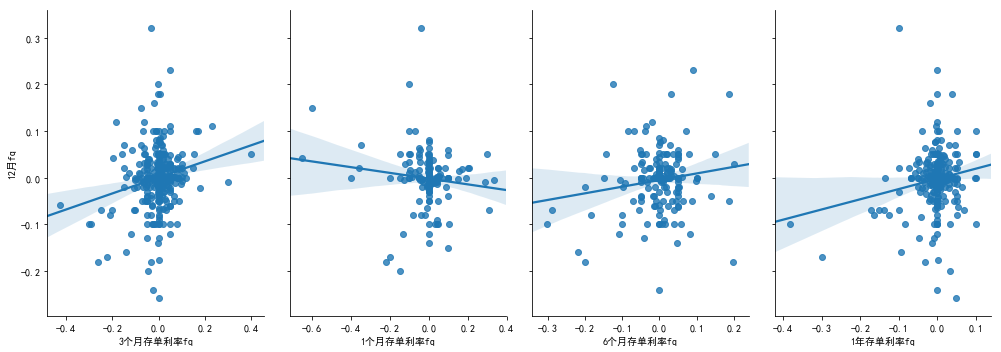

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


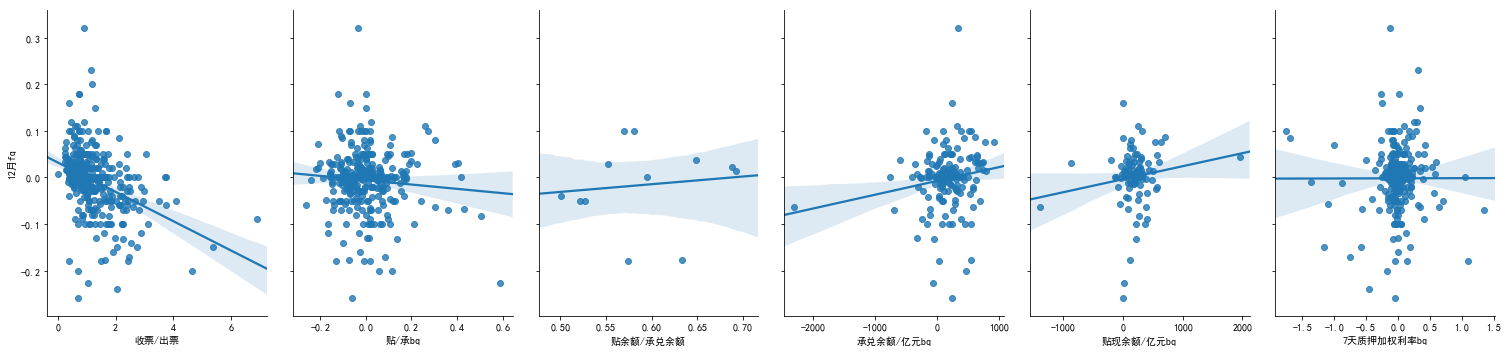

const        0.039281
6个月存单利率fq    0.102921
收票/出票       -0.038578
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  12月fq   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     39.42
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           9.37e-16
Time:                        16:23:37   Log-Likelihood:                 443.66
No. Observations:                 274   AIC:                            -881.3
Df Residuals:                     271   BIC:                            -870.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

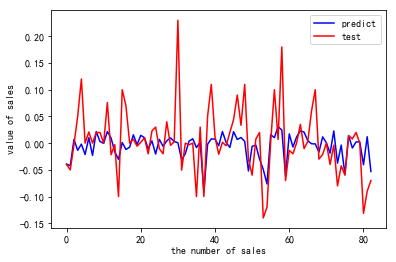

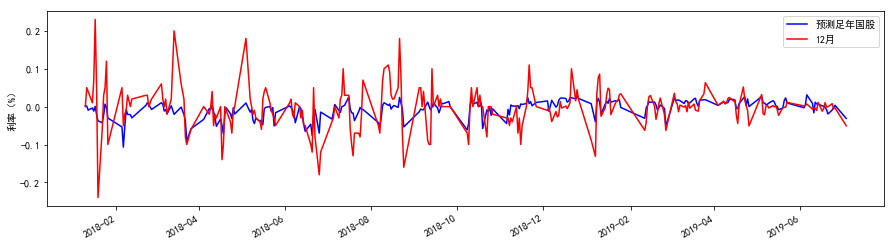

2019-07-07 16:23:38


In [43]:
sns.pairplot(df, x_vars=['3个月存单利率fq','1个月存单利率fq','6个月存单利率fq','1年存单利率fq',], y_vars='12月fq',kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。
sns.pairplot(df, x_vars=['收票/出票','贴/承bq','贴余额/承兑余额','承兑余额/亿元bq','贴现余额/亿元bq','7天质押加权利率bq'], y_vars='12月fq',kind="reg", size=5, aspect=0.7)
plt.show()  #注意必须加上这一句，否则无法显示。

# 做线性回归
yuanshi_df=df[['日期','6个月存单利率fq','收票/出票',
             '12月fq']]
yuanshi_df=yuanshi_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值


for i in range(len(yuanshi_df)):
    if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['30','31','29','28','27','01','02','03']:
        yuanshi_df = yuanshi_df.drop(i)
yuanshi_df=yuanshi_df.dropna(how='any')



x=yuanshi_df[['6个月存单利率fq','收票/出票']]
#x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta=np.array([1,10])
e = np.random.normal(size=len(df))
#y = np.dot(X, beta) + e
y=yuanshi_df['12月fq']

model=sm.OLS(y.astype(float),X.astype(float))
model1=model.fit()
print(model1.params)
print(model1.summary())


#使用预测准确率

from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
linreg=LinearRegression()
model=linreg.fit(X_train, y_train)#yh=lr.predict(x)  #.reshape(-1,1)
congidence=linreg.score(X_test, y_test)  #查看测试模型的准确率
print('输出模型:')
print (model)
print('输出准确率：')
print(congidence)
    # 训练后模型截距
print('输出截距：')
print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
print('输出权重：')

print (linreg.coef_)




 #画图
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
y_pred = linreg.predict(X_test)
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/12)  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

print(explained_variance_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


print( "MSE:%",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:%" ,np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    #做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()


#六、模型画图
y_pred = linreg.predict(X)


yuanshi_df['日期'] = pd.to_datetime(yuanshi_df['日期'])   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式

xx=yuanshi_df['日期'].tolist()

yy=yuanshi_df['12月fq'].tolist()


#print(xx)
#print(len(xx))
#print(yy)
#print(len(yy))
#print(y_pred)
#print(len(y_pred))
yyy=yy*(1+y_pred)
mpl.rcParams['font.sans-serif'] = ['SimHei']  #配置显示中文，否则乱码
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号，如果是plt画图，则将mlp换成plt
#for i in range(0,len(y_pred)):
 #   yyy[i]=yy[i]*(1+y_pred[i])

    #做ROC曲线
plt.figure()


plt.plot(xx,y_pred,'b',label="预测足年国股")
plt.plot(xx,yy,'r',label="12月")
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('利率（%）')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
fig =plt.gcf()
fig.set_size_inches(15, 4)
#fig.savefig('images/piaojiaosuol.png') 
    

plt.show()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

# 用感知机预测上涨或下跌 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


得到训练结果，权重矩阵:
[[ 4.58275557 -1.75944315]]
输出截距:
[ 0.]
输出准确性：
0.391304347826
0.441988950276


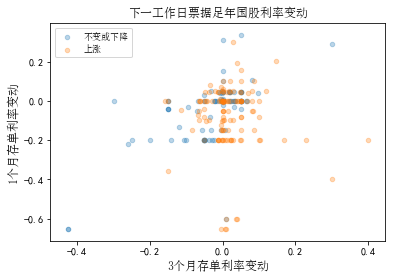

[0 1]
2.60466248826


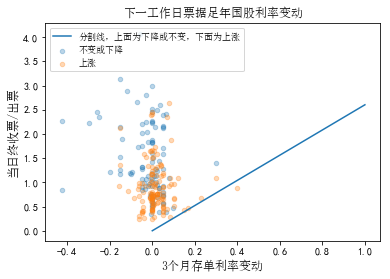

2019-04-04 17:06:02


In [41]:

# 做线性回归
yuanshi_df=df[['日期','1个月存单利率fq','3个月存单利率fq','收票/出票','12月fq']]
yuanshi_df=yuanshi_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值

yuanshi_df['12月fq2']=0
for i in range(len(yuanshi_df)):
    if yuanshi_df['12月fq'][i]>=0:
        yuanshi_df['12月fq2'][i]=1 
    
    if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['30','31','29','28','27','01','02','03']:
        yuanshi_df = yuanshi_df.drop(i)

yuanshi_df=yuanshi_df.dropna(how='any')
#print(yuanshi_df)


X=yuanshi_df[[     '3个月存单利率fq',
            #     '1个月存单利率fq',
             
            # '1年存单利率fq',
              '收票/出票'
            #  '贴余额/承兑余额b','贴/承b','贴/交b','承兑余额/亿元bq','贴现余额/亿元bq',
            #   '7天质押加权利率bq','7天同存加权利率bq','隔夜质押加权利率bq','隔夜同存加权利率bq'
                 ]]

y=yuanshi_df['12月fq2']


#训练数据和测试数据

from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)




from sklearn.linear_model import Perceptron
#定义感知机
clf = Perceptron(fit_intercept=False,n_iter=30,shuffle=False)
#使用训练数据进行训练
clf.fit(X_train,y_train)
#
print('得到训练结果，权重矩阵:')

print(clf.coef_)
#输出为：[[-0.38478876,4.41537463]]

#超平面的截距，此处输出为：[0.]
print('输出截距:')

print(clf.intercept_)
#利用测试数据进行验证
print('输出准确性：')
acc = clf.score(X_test,y_test)
print(acc)

acc = clf.score(X_train,y_train)
print(acc)
#得到的输出结果为0.995，这个结果还不错吧。


from matplotlib import pyplot as plt
#画出正例和反例的散点图
from matplotlib.colors import ListedColormap

#discrete color scheme
#cMap = ListedColormap(['white', 'green', 'blue'])

#plt.scatter(x=yuanshi_df['3个月存单利率fq'],y=yuanshi_df['收票/出票'],c=yuanshi_df['12月fq2'],edgecolors='face',s=20)
#cbar = plt.colorbar()




yuanshi_dfz=yuanshi_df[yuanshi_df['12月fq2']==1]
yuanshi_dfd=yuanshi_df[yuanshi_df['12月fq2']==0]


plt.scatter(x=yuanshi_dfd['3个月存单利率fq'],y=yuanshi_dfd['1个月存单利率fq'],edgecolors='face',s=20,alpha=0.3,label='不变或下降')
plt.scatter(x=yuanshi_dfz['3个月存单利率fq'],y=yuanshi_dfz['1个月存单利率fq'],edgecolors='face',s=20,alpha=0.3,label='上涨')
plt.title('下一工作日票据足年国股利率变动', fontproperties=font_set) 
#cbar = plt.colorbar()
plt.legend(prop=font_set2,loc='upper left')  #显示lable位置
plt.ylabel('1个月存单利率变动',fontproperties=font_set)
plt.xlabel('3个月存单利率变动',fontproperties=font_set)
plt.show()
#cbar.set_yticklabels(['1','2','3'])
#cbar.set_label('# of contacts', rotation=270)

#plt.scatter(positive_x1,positive_x2,c='red')
#plt.scatter(negetive_x1,negetive_2,c='blue')
#画出超平面（在本例中即是一条直线）
line_x = np.arange(0,2)
print(line_x)


plt.scatter(x=yuanshi_dfd['3个月存单利率fq'],y=yuanshi_dfd['收票/出票'],edgecolors='face',s=20,alpha=0.3,label='不变或下降')
plt.scatter(x=yuanshi_dfz['3个月存单利率fq'],y=yuanshi_dfz['收票/出票'],edgecolors='face',s=20,alpha=0.3,label='上涨')
plt.title('下一工作日票据足年国股利率变动', fontproperties=font_set) 
#cbar = plt.colorbar()
plt.legend(prop=font_set2,loc='upper left')  #显示lable位置
plt.ylabel('当日终收票/出票',fontproperties=font_set)
plt.xlabel('3个月存单利率变动',fontproperties=font_set)



print((-clf.coef_[0][0] / clf.coef_[0][1]))
line_y = line_x * (-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_
plt.plot(line_x,line_y,label='分割线，上面为下降或不变，下面为上涨')
plt.title('下一工作日票据足年国股利率变动', fontproperties=font_set) 
plt.legend(prop=font_set2,loc='upper left')  #显示lable位置

plt.show()



print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

# 用KNN预测上涨或下跌 

             日期  6个月存单利率fq     收票/出票      贴/承b     12月fq
384  2019-07-19       0.00  1.011628  0.571292 -0.012735
385  2019-07-22       0.00  1.128788  0.612553 -0.049276
386  2019-07-23       0.00  1.490196  0.812658 -0.047831
387  2019-07-24       0.02  1.151079  0.559613 -0.055349
388  2019-07-25       0.02  1.153153  0.564531 -0.055349
0      0.000000
1     -0.090000
2     -0.150000
3      0.050000
4      0.000000
5      0.050000
6      0.000000
7      0.050000
8      0.040000
9      0.010000
10     0.070000
11     0.230000
12     0.050000
13    -0.240000
14    -0.060000
15     0.030000
16     0.050000
17     0.120000
18    -0.100000
19    -0.100000
20     0.000000
21    -0.040000
22     0.040000
23     0.000000
24     0.050000
25    -0.050000
26    -0.020000
27    -0.010000
28     0.030000
29     0.000000
         ...   
359    0.011267
360   -0.012101
361   -0.004862
362    0.010486
363   -0.001266
364   -0.000713
365    0.007850
366   -0.005740
367   -0.003107
368   -0.006382
36

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


278


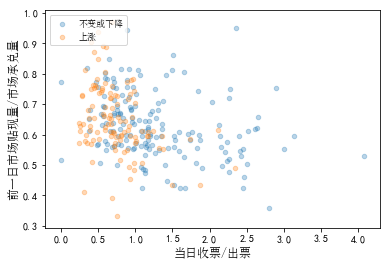

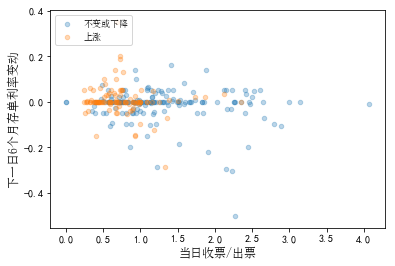

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# 做线性回归
yuanshi_df=df[['日期',
               #'3个月存单利率fq',
             #  '1个月存单利率fq',
               '6个月存单利率fq',
               #'1年存单利率fq',
               '收票/出票',
              # '贴余额/承兑余额b',
               '贴/承b',
               #'贴/交b','承兑余额/亿元bq','贴现余额/亿元bq',
               #'7天质押加权利率bq','7天同存加权利率bq','隔夜质押加权利率bq','隔夜同存加权利率bq',
               '12月fq']]
yuanshi_df=yuanshi_df.fillna(method='ffill')  #用缺失值前面的数字填充缺失值


print(yuanshi_df.tail())



x1=yuanshi_df.loc[len(yuanshi_df)-1,'6个月存单利率fq']
x2= yuanshi_df.loc[len(yuanshi_df)-1,'收票/出票']
x3=  yuanshi_df.loc[len(yuanshi_df)-1,'贴/承b']
    
    
    
yuanshi_df['12月fq2']=0
print(yuanshi_df['12月fq'])
for i in range(len(yuanshi_df)):
    if yuanshi_df['12月fq'][i]>0:
        yuanshi_df['12月fq2'][i]=1 
  #  elif yuanshi_df['12月fq'][i]<=-0.01:
   #     yuanshi_df['12月fq2'][i]=-1 
    
    
    
    if (yuanshi_df['日期'][i])[len(yuanshi_df['日期'][i])-2:]  in ['30','31','29','28','27','01','02','03']:
        yuanshi_df = yuanshi_df.drop(i)

yuanshi_df=yuanshi_df.dropna(how='any')



X=yuanshi_df[[  #   '3个月存单利率fq','1个月存单利率fq',
         #    '1年存单利率fq',
           #  '贴余额/承兑余额b',
   '贴/承b',
    #'贴/交b',
         #'3个月存单利率fq',
   # '1个月存单利率fq',
    #'1个月存单利率fq',
    '6个月存单利率fq',
    #      '1年存单利率fq',
    '收票/出票'
    #,'承兑余额/亿元bq','贴现余额/亿元bq',
          #    '7天质押加权利率bq','7天同存加权利率bq','隔夜质押加权利率bq','隔夜同存加权利率bq'
            #  '贴余额/承兑余额b','贴/承b','贴/交b','承兑余额/亿元bq','贴现余额/亿元bq',
            #   '7天质押加权利率bq','7天同存加权利率bq','隔夜质押加权利率bq','隔夜同存加权利率bq'
                 ]]

y=yuanshi_df['12月fq2']

print(len(y))

yuanshi_dfz=yuanshi_df[yuanshi_df['12月fq2']==1]
yuanshi_dfd=yuanshi_df[yuanshi_df['12月fq2']==0]
plt.scatter(x=yuanshi_dfd['收票/出票'],y=yuanshi_dfd['贴/承b'],edgecolors='face',s=20,alpha=0.3,label='不变或下降')
plt.scatter(x=yuanshi_dfz['收票/出票'],y=yuanshi_dfz['贴/承b'],edgecolors='face',s=20,alpha=0.3,label='上涨')

#cbar = plt.colorbar()
plt.legend(prop=font_set2,loc='upper left')  #显示lable位置
plt.ylabel('前一日市场贴现量/市场承兑量',fontproperties=font_set)
plt.xlabel('当日收票/出票',fontproperties=font_set)
plt.show()
#训练数据和测试数据

yuanshi_dfz=yuanshi_df[yuanshi_df['12月fq2']==1]
yuanshi_dfd=yuanshi_df[yuanshi_df['12月fq2']==0]
plt.scatter(x=yuanshi_dfd['收票/出票'],y=yuanshi_dfd['6个月存单利率fq'],edgecolors='face',s=20,alpha=0.3,label='不变或下降')
plt.scatter(x=yuanshi_dfz['收票/出票'],y=yuanshi_dfz['6个月存单利率fq'],edgecolors='face',s=20,alpha=0.3,label='上涨')

#cbar = plt.colorbar()
plt.legend(prop=font_set2,loc='upper left')  #显示lable位置
plt.xlabel('当日收票/出票',fontproperties=font_set)
plt.ylabel('下一日6个月存单利率变动',fontproperties=font_set)
plt.show()


from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
#X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=1)


#for i in range(2,30):
#  knn_classifier=KNeighborsClassifier(i)
#  knn_classifier.fit(x_train,y_train)
#  y_predict=knn_classifier.predict(x_test)
#  scores=knn_classifier.score(x_test,y_test)
#  print('acc:{}'.format(sum(y_predict==y_test)/len(x_test)),scores)


knn_classifier=KNeighborsClassifier(12)
knn_classifier.fit(x_train,y_train)
y_predict=knn_classifier.predict(x_test)
scores=knn_classifier.score(x_test,y_test)
print('acc:{}'.format(sum(y_predict==y_test)/len(x_test)),scores)





y_predict=knn_classifier.predict(X)


yuanshi_df['日期'] = pd.to_datetime(yuanshi_df['日期'])   #,format='%Y%m%d'  吧yyyy-m-d 转化为yyyy-mm-dd的时间格式
yuanshi_df.to_csv('dddd.csv')


xx=yuanshi_df['日期'].tolist()

yy=(yuanshi_df['12月fq2']).tolist()


for i in y_predict:
    if int(i)==0:
        i=-1.0
   
print(y_predict)
plt.figure()



plt.scatter(x=xx,y=y_predict,edgecolors='face',s=16,alpha=0.3,label='预测')
#plt.scatter(x=xx,y=yy,edgecolors='face',s=20,alpha=0.3,label='实际')

plt.legend(prop=font_set2,loc='upper left')  #显示lable位置
#plt.xlabel('当日收票/出票',fontproperties=font_set)
plt.ylabel('下一日利率变动',fontproperties=font_set)
plt.show()


plt.gcf().autofmt_xdate()  # 自动旋转日期标记
fig =plt.gcf()
fig.set_size_inches(15, 4)
#fig.savefig('images/piaojiaosuol.png') 
    

plt.show()


w=[[x1,x2,x3]]
print(w)
#w= sm.add_constant(w)
y_pred = knn_classifier.predict(w)
print(y_pred)